<a href="https://colab.research.google.com/github/Indongspace/mulcamp34/blob/main/ml_2%EC%9D%BC%EC%B0%A8%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.9736842105263158


[Text(0.4, 0.9, 'x[3] <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[3] <= 1.75\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.7, 0.3, 'x[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

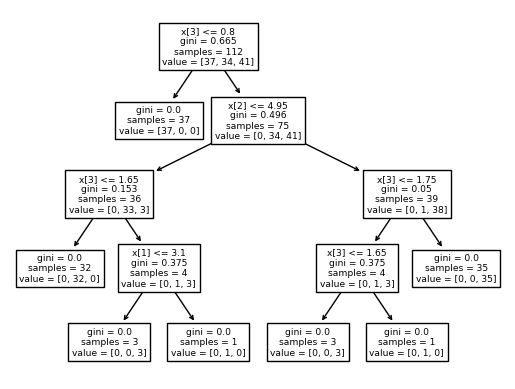

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 데이터 불러오기
iris = load_iris()
# 데이터 가공
X = iris.data
y = iris.target
# 데이터셋 분리
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
# 모델링
clf = DecisionTreeClassifier(max_depth=5,random_state=0)
# 모델 학습
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print(accuracy_score(y_test,pred))

tree.plot_tree(clf)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

iris_data = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=121)

dtree = DecisionTreeClassifier()

parameters = {
    'max_depth' : [1,2,3],
    'min_samples_split' : [2,3]
}

In [ ]:
import pandas as pd

# GridSearch
grid_dtree = GridSearchCV(dtree,param_grid=parameters,cv=3,refit=True) # 가장 좋은 파라미터 설정으로 재학습 시킴
# GridSearch 학습
grid_dtree.fit(X_train,y_train) # 3*2 = 6
# 결과 추출
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004670,0.000478,0.002994,0.000802,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.700,0.7,0.70,0.700000,1.110223e-16,5
1,0.002692,0.000977,0.002004,0.001417,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.700,0.7,0.70,0.700000,1.110223e-16,5
2,0.002170,0.000599,0.002353,0.001267,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.925,1.0,0.95,0.958333,3.118048e-02,3
3,0.002014,0.000818,0.001664,0.000931,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.925,1.0,0.95,0.958333,3.118048e-02,3
4,0.002003,0.000819,0.001330,0.000479,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.975,1.0,0.95,0.975000,2.041241e-02,1
5,0.002736,0.000534,0.002348,0.000485,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.975,1.0,0.95,0.975000,2.041241e-02,1


In [ ]:
# 최적의 파라미터
grid_dtree.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [ ]:
grid_dtree.best_score_

0.975

In [ ]:
estimator = grid_dtree.best_estimator_
estimator

DecisionTreeClassifier(max_depth=3)

In [ ]:
pred = estimator.predict(X_test)
accuracy_score(y_test,pred)

0.9666666666666667

In [ ]:
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels

array([0, 1, 4, 5, 3, 3, 2, 2])

In [ ]:
encoder.classes_

array(['TV', '냉장고', '믹서', '선풍기', '전자레인지', '컴퓨터'], dtype='<U5')

In [ ]:
encoder.inverse_transform([4,5,2])

array(['전자레인지', '컴퓨터', '믹서'], dtype='<U5')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 2차원 nparray로 변환
items = np.array(items).reshape(-1,1)
print(items.shape)

# 원 핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)
oh_labels.toarray()

(8, 1)


array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [ ]:
df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


In [ ]:
df

,item
0,TV
1,냉장고
2,전자레인지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data,columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_scaled = pd.DataFrame(data=iris_scaled,columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_scaled = pd.DataFrame(data=iris_scaled,columns=iris.feature_names)
print('feature들의 최솟 값')
print(iris_scaled.min())
print('\nfeature들의 최댓 값')
print(iris_scaled.max())

feature들의 최솟 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
titanic_df = pd.read_csv('data/titanic_train.csv')
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('N')
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('N')
print(titanic_df.isnull().sum().sum())

0


In [ ]:
titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
titanic_df['Cabin'].value_counts()

Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

In [ ]:
titanic_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64

In [ ]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1] # str 활용 한다는 말은 문자열 값을 문자 클래스로 변형해서 처리를 하겠다.
titanic_df['Cabin'].head(3)

0    N
1    C
2    N
Name: Cabin, dtype: object

In [ ]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

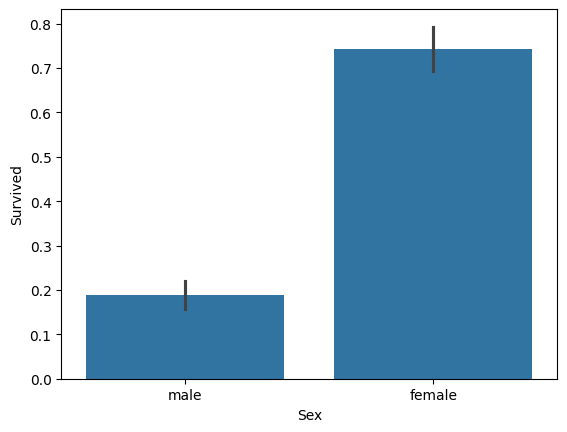

In [ ]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

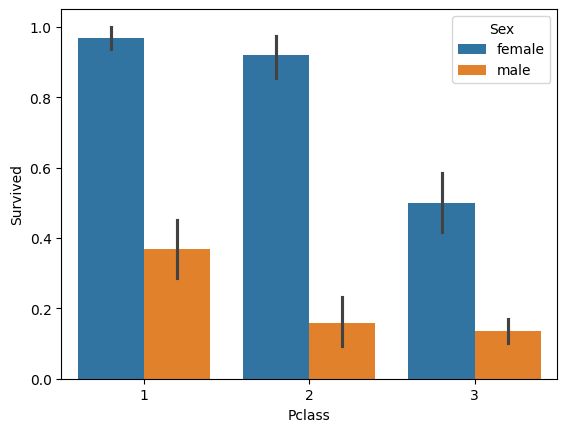

In [ ]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

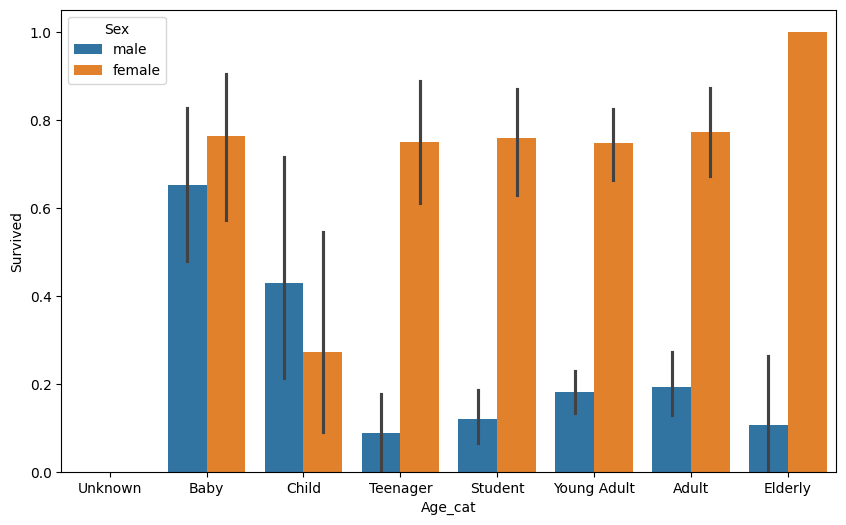

In [ ]:
def get_category(age):
    cat = ''
    if age<=-1: cat='Unknown'
    elif age<=5: cat='Baby'
    elif age<=12: cat='Child'
    elif age<=18: cat='Teenager'
    elif age<=25: cat='Student'
    elif age<=35: cat='Young Adult'
    elif age<=60: cat='Adult'
    else: cat='Elderly'

    return cat

plt.figure(figsize=(10,6))
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [ ]:
from sklearn.preprocessing import LabelEncoder

def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [ ]:
titanic_df = pd.read_csv('data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)
X_titanic_df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    X_titanic_df,y_titanic_df,test_size=0.2,random_state=11
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test,rf_pred)))

lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도 : 0.7877
RandomForestClassifier 정확도 : 0.8547
LogisticRegression 정확도 : 0.8659


In [ ]:
from sklearn.model_selection import KFold

def exec_kfold(clf,folds=5):
    kfold = KFold(n_splits=folds)
    scores = []

    for iter_count, (train_index,test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        clf.fit(X_train,y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test,predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count,accuracy))

    mean_score = np.mean(scores)
    print("평균 정확도 : {0:.4f}".format(mean_score))

exec_kfold(dt_clf,folds=5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도 : 0.7823


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)

scores

array([0.74301676, 0.7752809 , 0.79213483, 0.78651685, 0.84269663])

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2,3,4,10],
             'min_samples_split': [2,3,5], 'min_samples_leaf': [1,5,8]}

grid_dclf = GridSearchCV(dt_clf,param_grid=parameters,scoring='accuracy',cv=5)
grid_dclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test,dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
